# Documentation

Here you will find the step-by-step process that was followed for the development of this case.

## 1. Downloading csv file

The file was downloaded and placed in the "data" folder.

## 2. Upload it to our PostgreSQL database manager.

#### 2.1.  BD and Table creation

The Stori database and the stori table are created to store the information from our CSV file. The commands used for creating the database, table, and importing the data were as follows:

- Table Creation command:

Create table stori (
	index_ varchar(80),
	cust_id varchar(80),
	activated_date date,
	last_payment_date date,
	balance numeric,
	balance_frequency numeric,
	purchases numeric, 
	oneoff_purchases numeric,
	installments_purchases numeric, 
	cash_advance numeric,
	purchases_frequency numeric,
	oneoff_purchases_frequency numeric,
	purchases_installments_frequency numeric,
	cash_advance_frequency numeric,
	cash_advance_trx int,
	purchases_trx int,
	credit_limit numeric,
	payments numeric,
	minimum_payments numeric,
	prc_full_payment numeric,
	tenure int,
	fraud int)

- Importation data command:

copy public.stori (index_, cust_id, activated_date, last_payment_date, balance, balance_frequency, purchases, oneoff_purchases, installments_purchases, cash_advance, purchases_frequency, oneoff_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, cash_advance_trx, purchases_trx, credit_limit, payments, minimum_payments, prc_full_payment, tenure, fraud) FROM 'C:/Users/calde/OneDrive/ESCRIT~1/Stori/Datos/STORI_~1.CSV' DELIMITER ';' CSV HEADER ENCODING 'UTF8' QUOTE '\"' ESCAPE '''';""

### 3. Establishing a database connection with Python

This step is primarily done in order to conduct an EDA (Exploratory Data Analysis).


In [1]:
# Importing libraries
import psycopg2
import psycopg2.extras
import pandas as pd
import os 
from pathlib import Path 

In [2]:
#Establishing connection
connection = psycopg2.connect(
        host= 'localhost',
        dbname = "Stori",
        user= "postgres" ,
        password = 'Contraseña',
        port = 5432)

### 4. I begin querying my table to conduct my EDA.

In [3]:
#I select all my tables to then put them into a dataframe.
Statement1 = """
Select
cust_id,
activated_date,
last_payment_date,
ROUND((balance/1000000),4) balance,
balance_frequency,
purchases,
oneoff_purchases,
installments_purchases,
ROUND((cash_advance/1000000),4)  as cash_advance,
purchases_frequency,
oneoff_purchases_frequency,
purchases_installments_frequency,
cash_advance_frequency,
cash_advance_trx,
purchases_trx,
credit_limit,
ROUND((payments/1000000),4) payments,
ROUND((minimum_payments/1000000),4) minimum_payments,
prc_full_payment,
tenure,
fraud
FROM
    stori

"""

In [4]:
# Use the cursor to aim the data
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
cursor.execute(Statement1)
df = cursor.fetchall()
print(type(df))

<class 'list'>


In [5]:
# I import pandas and define my dataframe object.
import pandas as pd
df = pd.DataFrame(df)
df.columns =["cust_id","activated_date","last_payment_date","balance","balance_frequency","purchases","oneoff_purchases","installments_purchases","cash_advance","purchases_frequency","oneoff_purchases_frequency","purchases_installments_frequency","cash_advance_frequency","cash_advance_trx","purchases_trx","credit_limit","payments","minimum_payments","prc_full_payment","tenure","fraud"]
df.head(5)

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,C10001,2019-10-06,2020-09-09,40.9007,0.818182,95.4,0,95.4,0.0000,0.166667,...,0.083333,0,0,2,1000,201.8021,139.5098,0,12,0
1,C10002,2019-10-06,2020-07-04,3202.4674,0.909091,0,0,0,6442.9455,0,...,0,0.25,4,0,7000,4103.0326,1072.3402,0.222222,12,0
2,C10003,2019-10-06,2020-09-17,2495.1489,1,773.17,773.17,0,0.0000,1,...,0,0,0,12,7500,622.0667,627.2848,0,12,0
3,C10004,2019-10-06,2020-08-24,1666.6705,0.636364,1499,1499,0,205.7880,0.083333,...,0,0.083333,1,1,7500,0.0000,None,0,12,0
4,C10005,2019-10-06,2020-10-20,817.7143,1,16,16,0,0.0000,0.083333,...,0,0,0,1,1200,678.3348,244.7912,0,12,0


In [6]:
#Info de mi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   cust_id                           8950 non-null   object
 1   activated_date                    8937 non-null   object
 2   last_payment_date                 8941 non-null   object
 3   balance                           8948 non-null   object
 4   balance_frequency                 8950 non-null   object
 5   purchases                         8950 non-null   object
 6   oneoff_purchases                  8950 non-null   object
 7   installments_purchases            8950 non-null   object
 8   cash_advance                      8838 non-null   object
 9   purchases_frequency               8950 non-null   object
 10  oneoff_purchases_frequency        8950 non-null   object
 11  purchases_installments_frequency  8950 non-null   object
 12  cash_advance_frequen

In [8]:
# Convertir los tipos de datos del DataFrame de Python
df['cust_id'] = df['cust_id'].astype('object')
df['activated_date'] = pd.to_datetime(df['activated_date']) # Convertir a tipo de fecha
df['last_payment_date'] = pd.to_datetime(df['last_payment_date']) # Convertir a tipo de fecha
df['balance'] = df['balance'].astype('float') # Convertir a tipo de dato float
df['balance_frequency'] = df['balance_frequency'].astype('float') # Convertir a tipo de dato float
df['purchases'] = df['purchases'].astype('float') # Convertir a tipo de dato float
df['oneoff_purchases'] = df['oneoff_purchases'].astype('float') # Convertir a tipo de dato float
df['installments_purchases'] = df['installments_purchases'].astype('float') # Convertir a tipo de dato float
df['cash_advance'] = df['cash_advance'].astype('float') # Convertir a tipo de dato float
df['purchases_frequency'] = df['purchases_frequency'].astype('float') # Convertir a tipo de dato float
df['oneoff_purchases_frequency'] = df['oneoff_purchases_frequency'].astype('float') # Convertir a tipo de dato float
df['purchases_installments_frequency'] = df['purchases_installments_frequency'].astype('float') # Convertir a tipo de dato float
df['cash_advance_frequency'] = df['cash_advance_frequency'].astype('float') # Convertir a tipo de dato float
df['cash_advance_trx'] = df['cash_advance_trx'].astype('int64') # Mantener como int64
df['purchases_trx'] = df['purchases_trx'].astype('int64') # Mantener como int64
df['credit_limit'] = df['credit_limit'].astype('float') # Convertir a tipo de dato float
df['payments'] = df['payments'].astype('float') # Convertir a tipo de dato float
df['minimum_payments'] = df['minimum_payments'].astype('float') # Convertir a tipo de dato float
df['prc_full_payment'] = df['prc_full_payment'].astype('float') # Convertir a tipo de dato float
df['tenure'] = df['tenure'].astype('int64') # Mantener como int64
df['fraud'] = df['fraud'].astype('int64') # Mantener como int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8950 non-null   object        
 1   activated_date                    8937 non-null   datetime64[ns]
 2   last_payment_date                 8941 non-null   datetime64[ns]
 3   balance                           8948 non-null   float64       
 4   balance_frequency                 8950 non-null   float64       
 5   purchases                         8950 non-null   float64       
 6   oneoff_purchases                  8950 non-null   float64       
 7   installments_purchases            8950 non-null   float64       
 8   cash_advance                      8838 non-null   float64       
 9   purchases_frequency               8950 non-null   float64       
 10  oneoff_purchases_frequency        8950 non-null 

In [10]:
# Obtener las columnas con tipos de datos object (categóricas)
categoricas = df.select_dtypes(include=['object'])

# Obtener las columnas con tipos de datos numéricos
numericas = df.select_dtypes(exclude=['object'])

# Mostrar los nombres de las columnas en cada grupo
print("Variables categóricas:")
print(categoricas.columns)

print("\nVariables numéricas:")
print(numericas.columns)


Variables categóricas:
Index(['cust_id'], dtype='object')

Variables numéricas:
Index(['activated_date', 'last_payment_date', 'balance', 'balance_frequency',
       'purchases', 'oneoff_purchases', 'installments_purchases',
       'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure', 'fraud'],
      dtype='object')


In [11]:
#Count by variable type
df.dtypes.value_counts()

float64           14
int64              4
datetime64[ns]     2
object             1
dtype: int64

In [12]:
# Dataframe size
df.shape

(8950, 21)

#### Are there explicit null values in the dataset?

In [13]:
df.isnull().any()

cust_id                             False
activated_date                       True
last_payment_date                    True
balance                              True
balance_frequency                   False
purchases                           False
oneoff_purchases                    False
installments_purchases              False
cash_advance                         True
purchases_frequency                 False
oneoff_purchases_frequency          False
purchases_installments_frequency    False
cash_advance_frequency              False
cash_advance_trx                    False
purchases_trx                       False
credit_limit                         True
payments                            False
minimum_payments                     True
prc_full_payment                    False
tenure                              False
fraud                               False
dtype: bool

#### If there are observations with null values, how many do we have for each variable?

In [14]:
df.isnull().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

#### How many null values do we have in total in the dataset?

In [15]:
df.isnull().sum().sum()

458

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

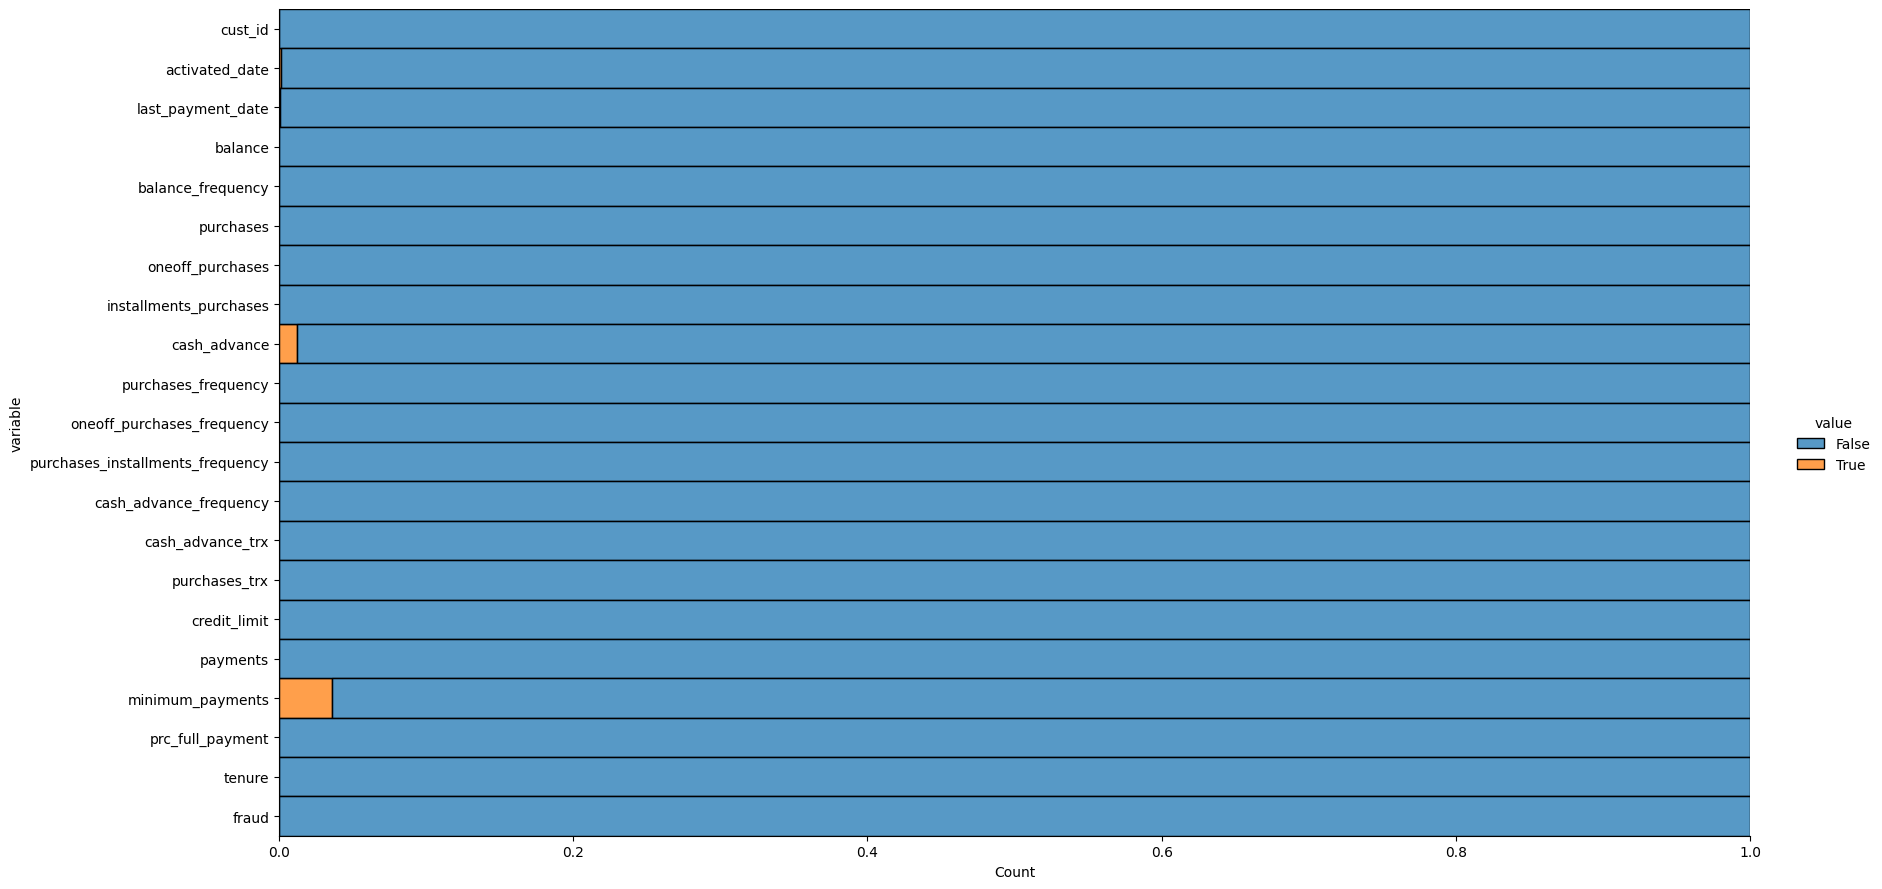

In [17]:
# Checking proportion of null values
df.isnull().melt().pipe(lambda df:
(sns.displot(data=df,y="variable", hue="value",multiple="fill", aspect=2, height=9)))

#### Let's explore our outlier values. 

The first thing I'm going to do is find some statistics to begin identifying my outliers.

In [18]:
#I define my function to avoid repeating code
def calcular_quartiles(columna):
    promedio = columna.mean()
    median = columna.median()
    Q1 = columna.quantile(q=0.25)
    Q3 = columna.quantile(q=0.75)
    min_val = columna.quantile(q=0)
    max_val = columna.quantile(q=1.0)
    return min_val, Q1, promedio,  median, Q3, max_val

In [19]:
# Execute the calculate_quartiles function for a specific column.
min_val, Q1, promedio,  median, Q3, max_val = calcular_quartiles(numericas["balance"])

# Create a DataFrame with the results
resultados_balance = pd.DataFrame({
    'Estadística': ['Mínimo', 'Q1', 'promedio','Mediana', 'Q3', 'Máximo'],
    'Valor': [min_val, Q1, promedio, median, Q3, max_val]
})

# Display the DataFrame with the results
print(resultados_balance)



  Estadística        Valor
0      Mínimo     0.000000
1          Q1    90.996875
2    promedio  1354.648095
3     Mediana   673.475500
4          Q3  1817.823950
5      Máximo  9993.352500


### Thresholds for outlier detection (symmetrically distributed data).

Data between $$Q_1 -1.5 \times \text{IQR}$$ and $$Q_3 + 1.5 \times \text{IQR}$$

In [18]:
# Find my IQR (Interquartile Range).
iqr = Q3 - Q1
## Range
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))


rango para detección de outliers: -2499243682.625, 4408064552.375


In [19]:
print(iqr,"   ",Q1,"   ",Q3, "   ", promedio )

1726827058.75     90996905.5     1817823964.25     1354648095.6110911


[Text(0.5, 0, '')]

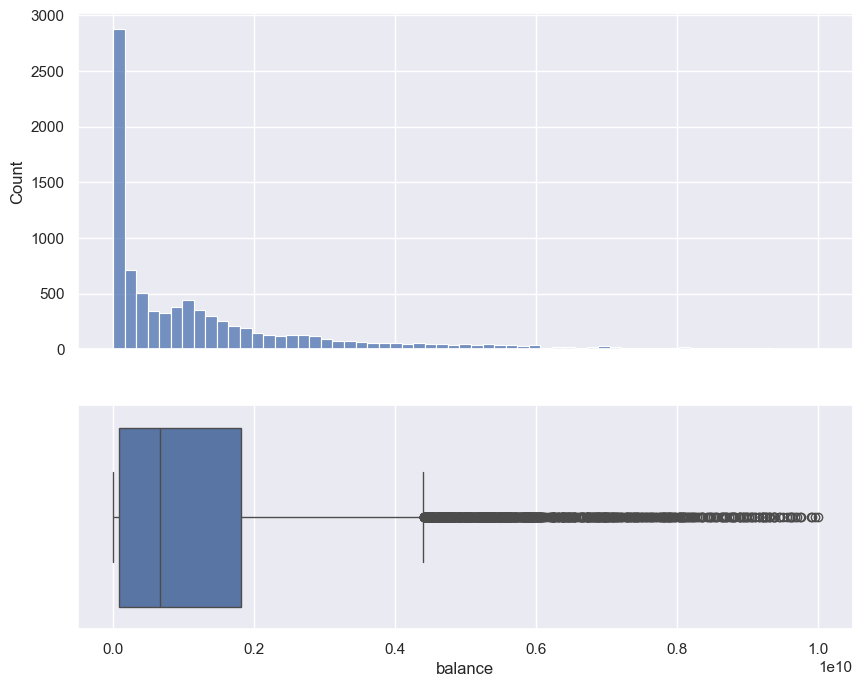

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(numericas["balance"], ax=ax_hist)
sns.boxplot(data=numericas, x="balance", ax=ax_box)
ax_hist.set(xlabel='')

### Note
The notation 1e10 refers to a number expressed in scientific notation, where 1e10 means "1 multiplied by 10 raised to the power of 10." It's a compact way of writing large numbers. For example, the number 0.2 appearing on the X-axis is not 0.2 but 0.2 1e10, which means 0.2 multiplied by 10 raised to the power of 10, equaling 2,000,000,000.
Now, if I wanted to visualize this code by category:

#### Code to visualize by category
sns.boxplot(x='cust_id', y='balance', data=numerical)

*The issue is that each customer should have a unique ID, so I would have multiple box plots, making it difficult to analyze outliers.*

### Conclusion on Outliers
For the balance case, we found that the data is grouped within a certain range of the sample space (mainly between 90,996,905.5 and 1,817,823,964.25, which would be the Q1 and Q3), and there aren't many atypical values for this specific column.

## 5. Approaching Questions

After completing my EDA, it's time to address the questions and, if necessary, perform the corresponding data imputation. 

### Question 1
- 1.1. Plot an histogram of the balance amount for all the customers.

Since we only found 2 null values in this column after conducting our EDA, what I'm going to do is replace these null values with the mean of my sample. To achieve this, I'll apply a function from my relational database manager to apply it to my query and bring here the query I need to just plot it.

- PL/pgSQL Function

In [ ]:
"""$$CREATE OR REPLACE FUNCTION calcular_promedio(columna_name TEXT)
RETURNS NUMERIC AS $$
DECLARE
    avg_value NUMERIC;
BEGIN
    EXECUTE format('SELECT AVG(%I) FROM stori', columna_name) INTO avg_value;
    RETURN avg_value;
END;
$$ LANGUAGE plpgsql;$$"""

Once I've created my query, I'll verify that the resulting value is the same as what I obtained in my previous EDA.

<img src="Img_1.png">

After verifying this value, I generate the statement for my query.

In [21]:
Statemente_1_1 = "select  cust_id, COALESCE(balance,calcular_promedio('balance')) from stori"

In [22]:
# Use the cursor to aim the data
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
cursor.execute(Statemente_1_1)
df = cursor.fetchall()
print(type(df))

<class 'list'>


In [23]:
# I import pandas and define my dataframe object.
import pandas as pd
df = pd.DataFrame(df)
df.columns =["cust_id","balance"]
df.head(5)

,cust_id,balance
0,C10001,40900749
1,C10002,3202467416
2,C10003,2495148862
3,C10004,1666670542
4,C10005,817714335


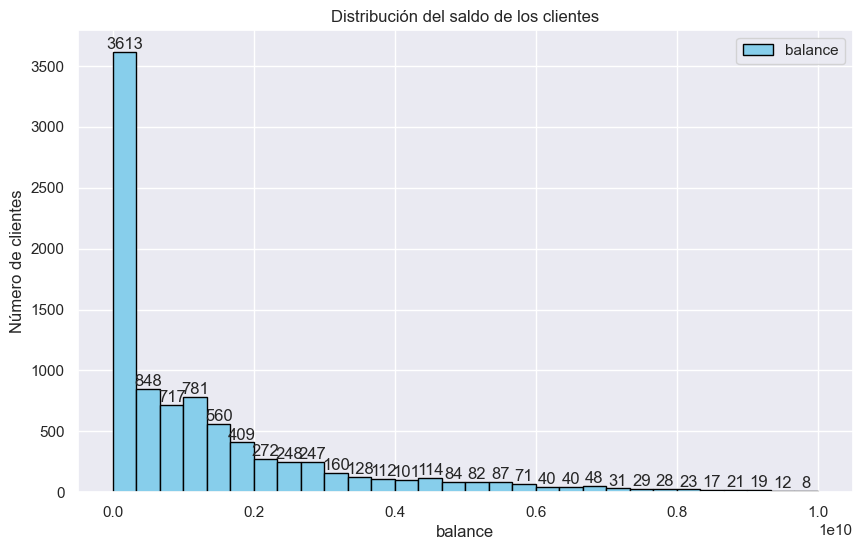

In [24]:
# Create the histogram
plt.figure(figsize=(10, 6))  # Size of the figure

# Balance histogram.
n, bins, patches = plt.hist(df['balance'], bins=30, color='skyblue', edgecolor='black')  # Definir el color y el borde
plt.title('Distribución del saldo de los clientes')  # Título del gráfico
plt.xlabel('balance')  # X-axis label.
plt.ylabel('Número de clientes')  # Y-axis label.

# Add legend
plt.legend(['balance'])

# Add data labels to each baR
for rect in patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

# Show the histogram
plt.show()

- 1.2. Report any structure you find and any hypotheses you have about that structure.

R= Just as we identified in our EDA, the majority of data is clustered between 90,996,905.5 and 1,817,823,964.25, which correspond to Q1 and Q3. We mainly observe that these data are heavily skewed, given the 3613 records with a balance in the first bin of our graph. What I can deduce from this graph is that there are no negative balances, indicating that customers are diligent in paying off their debts. However, we could say they are living on the edge (financially speaking) since the majority's balance is not significantly high, or it could be considered an outlier. However, to draw this conclusion, we are conducting a univariate analysis, and we cannot reach a much deeper insight yet.

- 1.3. Report mean and median balance, grouped by year and month of activated_date.

Similarly, I'll use SQL to answer this question. The query I'll use to retrieve the information from my database is as follows:

In [26]:
Statemente_1_3 = """
SELECT
    EXTRACT(YEAR FROM activated_date) AS year,
    EXTRACT(MONTH FROM activated_date) AS month,
    percentile_cont(0.5) WITHIN GROUP (ORDER BY balance) AS median_balance,
    CAST(AVG(balance) AS double precision) AS average_balance
FROM
    stori
GROUP BY
    year,
    month;
"""


In [27]:
# Use the cursor to aim the data
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
cursor.execute(Statemente_1_3)
df = cursor.fetchall()
print(type(df))

<class 'list'>


In [28]:
# I import pandas and define my dataframe object.
import pandas as pd
df = pd.DataFrame(df)
df.columns =["YEAR","MONTH","Median_balance","Average_balance"]
df

,YEAR,MONTH,Median_balance,Average_balance
0,2019,10,1.191584e+09,1.988509e+09
1,2019,11,9.025654e+08,1.567504e+09
2,2019,12,1.052562e+09,1.769914e+09
3,2020,1,1.037137e+09,1.627167e+09
4,2020,2,8.491913e+08,1.533852e+09
5,2020,3,6.347654e+08,1.357245e+09
6,2020,4,7.406939e+08,1.303230e+09
7,2020,5,5.284708e+08,1.097296e+09
8,2020,6,3.455323e+08,8.362509e+08
9,2020,7,1.426375e+08,5.772894e+08


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             10 non-null     object 
 1   MONTH            10 non-null     object 
 2   Median_balance   11 non-null     float64
 3   Average_balance  11 non-null     float64
dtypes: float64(2), object(2)
memory usage: 480.0+ bytes


In [29]:
df['Fecha'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str)
df = df.dropna()
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m')
df

C:\Users\calde\AppData\Local\Temp\ipykernel_28216\1659558361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m')


,YEAR,MONTH,Median_balance,Average_balance,Fecha
0,2019,10,1.191584e+09,1.988509e+09,2019-10-01
1,2019,11,9.025654e+08,1.567504e+09,2019-11-01
2,2019,12,1.052562e+09,1.769914e+09,2019-12-01
3,2020,1,1.037137e+09,1.627167e+09,2020-01-01
4,2020,2,8.491913e+08,1.533852e+09,2020-02-01
5,2020,3,6.347654e+08,1.357245e+09,2020-03-01
6,2020,4,7.406939e+08,1.303230e+09,2020-04-01
7,2020,5,5.284708e+08,1.097296e+09,2020-05-01
8,2020,6,3.455323e+08,8.362509e+08,2020-06-01
9,2020,7,1.426375e+08,5.772894e+08,2020-07-01


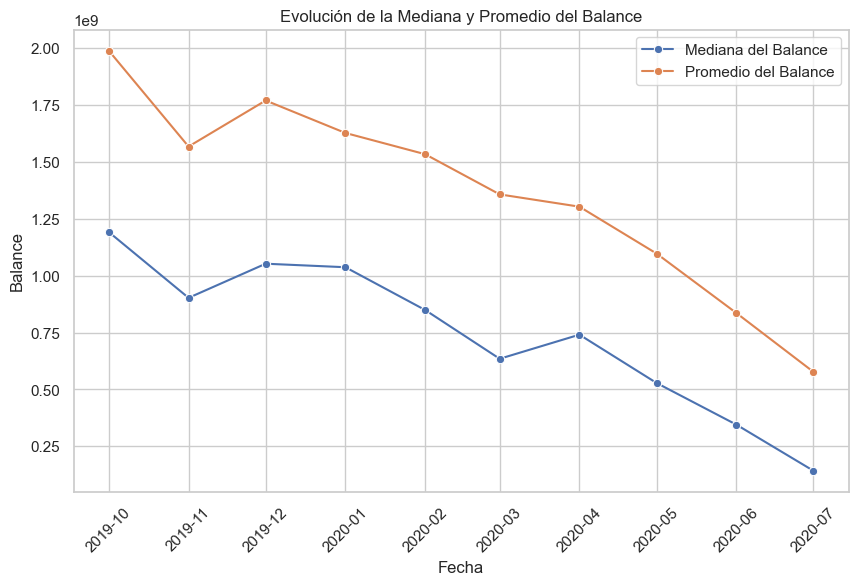

In [30]:
# Assuming you have a DataFrame named df with the columns 'Date', 'Median_balance', and 'Average_balance'

# Set the Seaborn style.
sns.set_style("whitegrid")

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Fecha', y='Median_balance', label='Mediana del Balance', marker='o')
sns.lineplot(data=df, x='Fecha', y='Average_balance', label='Promedio del Balance', marker='o')

# Add title and axis labels.
plt.title('Evolución de la Mediana y Promedio del Balance')
plt.xlabel('Fecha')
plt.ylabel('Balance')
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Show the graphic
plt.show()


Algo interesante de este grafico es la tendencia tanto del promedio como de la mediana del balance en disminuir a través del tiempo, si bien no tuvimos en cuenta los valores faltantes de la fecha de activación para este gráfico (13 según nuestro EDA que vendrían a ser tan solo 1,4% de nuestra muestra (muy poco significativo para afectar nuestro analisis)), podemos evidenciar que se han disminuido el balance por lo que podemos concluir dos cosas: o estamos activando menos cantidad de tarjetas o el balance de cada de una de esas tarjetas que activamos es menor, a mi parecer es la primera opción.

### Question 2
- 2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit.

I'm going to use an SQL statement to answer this question. The command I'll use to fetch the information from my database is as follows:


In [33]:
Statemente_2_1 = """
Select 
RIGHT(cust_id, LENGTH(cust_id)-1) as new_cust_id, 
to_char(activated_date,'YYYY-MM') as new_activated_date,
to_char(last_payment_date,'YYYY-MM-DD') as new_last_payment_date,
new_cash_advance,
credit_limit,
ROUND((new_cash_advance/credit_limit),2) calculated_field
From
(SELECT
	EXTRACT(YEAR FROM last_payment_date) AS year,
    EXTRACT(MONTH FROM last_payment_date) AS month,
	cust_id,
	activated_date,
	last_payment_date,
	ROUND((cash_advance/1000000),4)  as new_cash_advance,
	credit_limit
FROM
    stori) as subconsulta
Where subconsulta.year = 2020
"""

In [34]:
# Use the cursor to aim the data
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
cursor.execute(Statemente_2_1)
df = cursor.fetchall()
print(type(df))

<class 'list'>


In [36]:
df = pd.DataFrame(df)
df.columns =["new_cust_id","new_activated_date","new_last_payment_date","new_cash_advance","credit_limit","calculated_field"]
df.head(5)

,new_cust_id,new_activated_date,new_last_payment_date,new_cash_advance,credit_limit,calculated_field
0,10001,2019-10,2020-09-09,0.0000,1000,0.00
1,10002,2019-10,2020-07-04,6442.9455,7000,0.92
2,10003,2019-10,2020-09-17,0.0000,7500,0.00
3,10004,2019-10,2020-08-24,205.7880,7500,0.03
4,10005,2019-10,2020-10-20,0.0000,1200,0.00


### Question 3
- 3.1 Build a predictive model for fraud.

The first thing I'll do is fetch my original DataFrame again, removing non-numeric fields to avoid affecting my model.

In [20]:
#I select all my tables to then put them into a dataframe.
Statement1_4 = """
Select
ROUND((balance/1000000),4) balance,
balance_frequency,
purchases,
oneoff_purchases,
installments_purchases,
ROUND((cash_advance/1000000),4)  as cash_advance,
purchases_frequency,
oneoff_purchases_frequency,
purchases_installments_frequency,
cash_advance_frequency,
cash_advance_trx,
purchases_trx,
credit_limit,
ROUND((payments/1000000),4) payments,
ROUND((minimum_payments/1000000),4) minimum_payments,
prc_full_payment,
tenure,
fraud
FROM
    stori

"""

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
# Use the cursor to aim the data
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
cursor.execute(Statement1_4)
df = cursor.fetchall()
print(type(df))

<class 'list'>


In [23]:
# I import pandas and define my dataframe object.
import pandas as pd
df = pd.DataFrame(df)
df.columns =["balance","balance_frequency","purchases","oneoff_purchases","installments_purchases","cash_advance","purchases_frequency","oneoff_purchases_frequency","purchases_installments_frequency","cash_advance_frequency","cash_advance_trx","purchases_trx","credit_limit","payments","minimum_payments","prc_full_payment","tenure","fraud"]
df.head(5)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,40.9007,0.818182,95.4,0,95.4,0.0000,0.166667,0,0.083333,0,0,2,1000,201.8021,139.5098,0,12,0
1,3202.4674,0.909091,0,0,0,6442.9455,0,0,0,0.25,4,0,7000,4103.0326,1072.3402,0.222222,12,0
2,2495.1489,1,773.17,773.17,0,0.0000,1,1,0,0,0,12,7500,622.0667,627.2848,0,12,0
3,1666.6705,0.636364,1499,1499,0,205.7880,0.083333,0.083333,0,0.083333,1,1,7500,0.0000,None,0,12,0
4,817.7143,1,16,16,0,0.0000,0.083333,0.083333,0,0,0,1,1200,678.3348,244.7912,0,12,0


In [114]:
# Convert the data types of the Python DataFrame.
df['balance'] = df['balance'].astype('float') # Convertir a tipo de dato float
df['balance_frequency'] = df['balance_frequency'].astype('float') # Convertir a tipo de dato float
df['purchases'] = df['purchases'].astype('float') # Convertir a tipo de dato float
df['oneoff_purchases'] = df['oneoff_purchases'].astype('float') # Convertir a tipo de dato float
df['installments_purchases'] = df['installments_purchases'].astype('float') # Convertir a tipo de dato float
df['cash_advance'] = df['cash_advance'].astype('float') # Convertir a tipo de dato float
df['purchases_frequency'] = df['purchases_frequency'].astype('float') # Convertir a tipo de dato float
df['oneoff_purchases_frequency'] = df['oneoff_purchases_frequency'].astype('float') # Convertir a tipo de dato float
df['purchases_installments_frequency'] = df['purchases_installments_frequency'].astype('float') # Convertir a tipo de dato float
df['cash_advance_frequency'] = df['cash_advance_frequency'].astype('float') # Convertir a tipo de dato float
df['cash_advance_trx'] = df['cash_advance_trx'].astype('int64') # Mantener como int64
df['purchases_trx'] = df['purchases_trx'].astype('int64') # Mantener como int64
df['credit_limit'] = df['credit_limit'].astype('float') # Convertir a tipo de dato float
df['payments'] = df['payments'].astype('float') # Convertir a tipo de dato float
df['minimum_payments'] = df['minimum_payments'].astype('float') # Convertir a tipo de dato float
df['prc_full_payment'] = df['prc_full_payment'].astype('float') # Convertir a tipo de dato float
df['tenure'] = df['tenure'].astype('int64') # Mantener como int64
df['fraud'] = df['fraud'].astype('int64') # Mantener como int64

### Replacing Null values

Identifying null values is essential for ensuring data quality, guiding preprocessing decisions, optimizing model performance, and enhancing feature engineering in predictive modeling tasks.

In [115]:
df.isnull().sum()

balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

**My data imputation method will be to replace null values with the mean.**

In [116]:
# Calculate the mean of each column
column_means1 = df["balance"].mean()
column_means2 = df["cash_advance"].mean()
column_means3 = df["credit_limit"].mean()
column_means4 = df["minimum_payments"].mean()


In [117]:
# Replace null values with the mean of the corresponding column
df["balance"].fillna(column_means1, inplace=True)
df["cash_advance"].fillna(column_means2, inplace=True)
df["credit_limit"].fillna(column_means3, inplace=True)
df["minimum_payments"].fillna(column_means4, inplace=True)

In [118]:
#I verify that there are no null values affecting my model.
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

Identifying the distribution of my main variable (column fraud)

- 0 --> Normal Transaction
- 1 --> fraudulent transaction

In [119]:
# distribution of legit transactions & fraudulent transactions
df['fraud'].value_counts()

0    8880
1      70
Name: fraud, dtype: int64

In [120]:
# separating the data for analysis
legit = df[df.fraud == 0]
fraud = df[df.fraud == 1]

In [121]:
print(legit.shape)
print(fraud.shape)

(8880, 18)
(70, 18)


In [122]:
# compare the values for both transactions
df.groupby('fraud').mean()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
fraud,,,,,,,,,,,,,,,,,
0,1340.428132,0.876530,904.3953,522.331735,382.366113,784.024854,0.487806,0.199271,0.361907,514.573004,3.162387,14.024775,4.865681e+06,1309.173108,631.844754,0.152943,11.515315
1,3158.552013,0.971299,13537.9000,9485.838000,4052.062000,1355.103631,0.813182,0.606713,0.685470,0.293939,14.214286,101.614286,1.272143e+04,2366.338341,2122.972917,0.251594,11.771429


Under-Sampling
Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
Number of Fraudulent Transactions --> 70

In [123]:
legit_sample = legit.sample(n=70)

Concatenating two DataFrames

In [124]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
6351,1981.1137,1.0,0.00,0.00,0.00,199.1832,0.000000,0.000000,0.000000,0.272727,3,0,2000.0,442.1713,3018.8920,0.000000,11,0
5156,5292.2644,1.0,0.00,0.00,0.00,3383.2997,0.000000,0.000000,0.000000,0.666667,9,0,8000.0,994.2102,1051.7093,0.000000,9,0
1812,1492.4334,1.0,99.75,34.32,65.43,0.0000,0.083333,0.083333,0.083333,0.000000,0,3,6000.0,2224.1876,382.9298,0.083333,12,0
5553,21.9608,1.0,175.45,0.00,175.45,0.0000,1.000000,0.000000,0.909091,0.000000,0,11,1500.0,143.6091,164.3616,0.777778,11,0
4295,876.8400,1.0,147.82,0.00,147.82,784.2293,0.250000,0.000000,0.250000,0.083333,1,3,1000.0,337.8128,355.1195,0.000000,12,0


In [125]:
new_dataset['fraud'].value_counts()

0    70
1    70
Name: fraud, dtype: int64

Splitting the data into Features & Targets

In [126]:
X = new_dataset.drop(columns='fraud', axis=1)
Y = new_dataset['fraud']

In [127]:
print(X)

        balance  balance_frequency  purchases  oneoff_purchases  \
6351  1981.1137           1.000000       0.00              0.00   
5156  5292.2644           1.000000       0.00              0.00   
1812  1492.4334           1.000000      99.75             34.32   
5553    21.9608           1.000000     175.45              0.00   
4295   876.8400           1.000000     147.82              0.00   
...         ...                ...        ...               ...   
7047  2980.0547           0.818182   26784.62          26514.32   
7425  1439.4102           1.000000     184.70            184.70   
7646  7081.1714           1.000000       0.00              0.00   
7783   858.8802           1.000000      65.00             65.00   
7891   191.3333           1.000000     637.19            168.54   

      installments_purchases  cash_advance  purchases_frequency  \
6351                    0.00    199.183200             0.000000   
5156                    0.00   3383.299700             0.0000

In [128]:
print(Y)

6351    0
5156    0
1812    0
5553    0
4295    0
       ..
7047    1
7425    1
7646    1
7783    1
7891    1
Name: fraud, Length: 140, dtype: int64


Split the data into Training data & Testing Data

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [130]:
print(X.shape, X_train.shape, X_test.shape)

(140, 17) (112, 17) (28, 17)


Model Training
Logistic Regression

In [131]:
model = LogisticRegression()

In [132]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

c:\Users\calde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation
Accuracy Score

In [133]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [134]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9017857142857143


In [135]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [136]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9285714285714286
